## Iris Flower Classification

In this micro project the different species of iris flower would be classified. The Iris flower data set is a multivariate data set introduced by the British biologist Ronald Fisher in his 1936 paper [Original Paper by R. Fisher](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x), which is also known as or Fisher's Iris data set. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

<img src="iris.png" style="width:700px">

In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Machine Learning
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import SciKit Learn Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Logistic Regression Class object
logreg = LogisticRegression(max_iter=2000)

The data and its description is available through scikit learn library:

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Preparing x,y for classification
x = load_iris().data
y = load_iris().target

In [7]:
# Make dataframe of x, y (data and target) and check the result
iris_df = pd.DataFrame(data=x, columns=['sepal length','sepal width','petal length','petal width'])
iris_df['species'] = y
iris_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Define "flower" function to replace the values of classes with their corresponding species
def flower(num):
    if num==0:
        return 'setosa'
    elif num==1:
        return 'versicolor'
    elif num==2:
        return 'virginica'
    
# Apply "flower" function to iris dataframe
iris_df['species'] = iris_df['species'].apply(flower)
iris_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Data Visualization

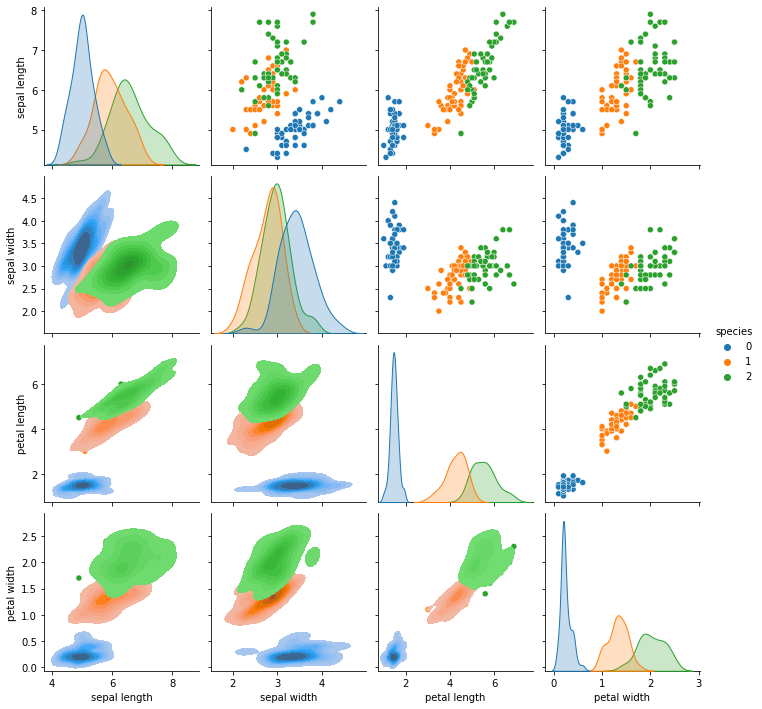

In [26]:
g = sns.pairplot(data=iris_df, hue='species', palette='tab10')
g.map_lower(sns.kdeplot, shade=True)

As shown in above scatter plots, the _setosa_ species (blue group) is quite distinct from the other two types in it would be somehow easy to classified. However, for the other types _versicolor_ and _virginica_ let see if considering all the features could we have a good classification or not.

### Multi Class Classificaiton, One vs All

In this section to seperate data into multiple classes, I used one vs all strategy using SciKit Learn library.
This method actually applying logistic regression for binary classification for each class. Then, the class that is predicted with the highest probability is assigned to that data point.

I made x and y data before and I will use them. To split the data into _training_ and _testing_ datasets, first I used train_test_split method and its default values, but later would set 60% of data for training and 40% for validation and will check the differences. 

#### split to training validation sets by default values

In [48]:
# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


So by default it dedicate ~75% of dataset for training and the other part for validation.

In [49]:
# Fit the model to training set
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

So now we can predict using the trained model and check the accuracy 

In [50]:
# Prediction from X_test
y_predict = logreg.predict(x_test)

#Check the accuracy
print('The accuracy of the model with 75% as training part is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

The accuracy of the model with 75% as training part is 97.37.


#### split to training validation sets by 60% training set

In [52]:
# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=3)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Fit the model to training set
logreg.fit(x_train, y_train)

# Prediction from X_test
y_predict = logreg.predict(x_test)

#Check the accuracy
print('The accuracy of the model with 60% as training part is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

(90, 4) (60, 4) (90,) (60,)
The accuracy of the model with 60% as training part is 96.67.


No any considerable change! Lets do some visualization.